In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "-1"

In [2]:
df = pd.read_csv('california_housing_sklearn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   SalePrice   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
len(df)*0.90

18576.0

In [5]:
bottom90 = df.sort_values('SalePrice').iloc[:18576]

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

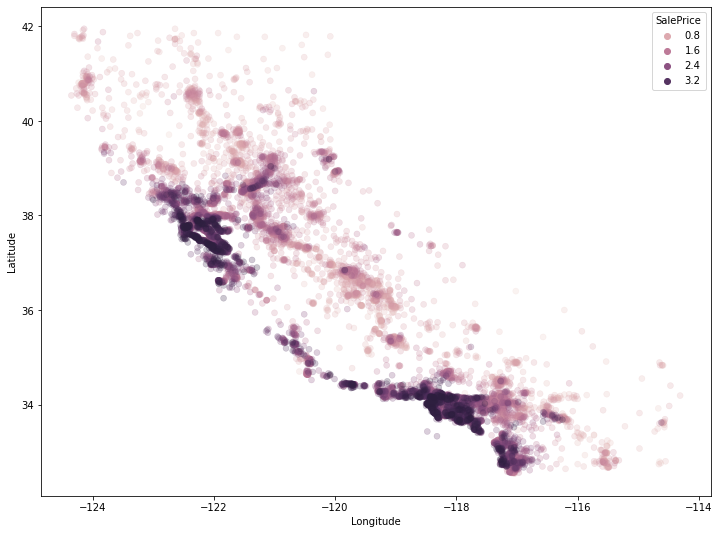

In [6]:
plt.figure(figsize=(12,9))
sns.scatterplot(x='Longitude', y='Latitude', data=bottom90, edgecolor=None, alpha=0.25, hue='SalePrice')

<AxesSubplot:xlabel='AveRooms', ylabel='SalePrice'>

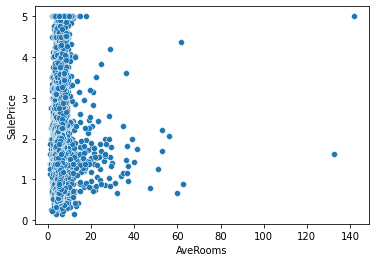

In [7]:
sns.scatterplot(x='AveRooms',y='SalePrice',data=df)

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

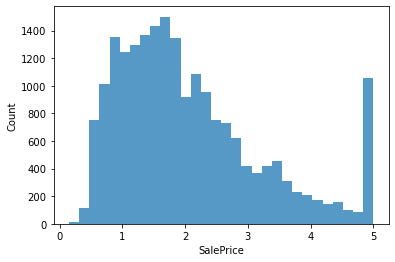

In [8]:
sns.histplot(x='SalePrice',data=df,bins=30, edgecolor=None)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [11]:
X = bottom90.drop('SalePrice',axis=1).values
y = bottom90['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
scaler = MinMaxScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
model = Sequential()
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')

In [15]:
early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=20, mode='min')

In [16]:
model.fit(x=X_train, y=y_train, epochs=500, batch_size=128, callbacks=[early_stop],
          validation_data=(X_test, y_test))

Epoch 1/500
102/102 [==============================] - 2s 12ms/step - loss: 3.3632 - val_loss: 0.6627
Epoch 2/500
102/102 [==============================] - 0s 1ms/step - loss: 0.6497 - val_loss: 0.5531
Epoch 3/500
102/102 [==============================] - 0s 1ms/step - loss: 0.5148 - val_loss: 0.3863
Epoch 4/500
102/102 [==============================] - 0s 1ms/step - loss: 0.3410 - val_loss: 0.3253
Epoch 5/500
102/102 [==============================] - 0s 1ms/step - loss: 0.3133 - val_loss: 0.3182
Epoch 6/500
102/102 [==============================] - 0s 1ms/step - loss: 0.3048 - val_loss: 0.3092
Epoch 7/500
102/102 [==============================] - 0s 2ms/step - loss: 0.3020 - val_loss: 0.3035
Epoch 8/500
102/102 [==============================] - 0s 1ms/step - loss: 0.2914 - val_loss: 0.2987
Epoch 9/500
102/102 [==============================] - 0s 1ms/step - loss: 0.2942 - val_loss: 0.3003
Epoch 10/500
102/102 [==============================] - 0s 1ms/step - loss: 0.2847 - val_l

Epoch 161/500
102/102 [==============================] - 0s 2ms/step - loss: 0.1983 - val_loss: 0.2218
Epoch 162/500
102/102 [==============================] - 0s 2ms/step - loss: 0.2115 - val_loss: 0.2090
Epoch 163/500
102/102 [==============================] - 0s 1ms/step - loss: 0.2040 - val_loss: 0.2078
Epoch 164/500
102/102 [==============================] - 0s 1ms/step - loss: 0.1988 - val_loss: 0.2103
Epoch 165/500
102/102 [==============================] - 0s 1ms/step - loss: 0.1996 - val_loss: 0.2110
Epoch 166/500
102/102 [==============================] - 0s 1ms/step - loss: 0.1958 - val_loss: 0.2083
Epoch 167/500
102/102 [==============================] - 0s 1ms/step - loss: 0.2047 - val_loss: 0.2090
Epoch 168/500
102/102 [==============================] - 0s 1ms/step - loss: 0.2075 - val_loss: 0.2187
Epoch 169/500
102/102 [==============================] - 0s 1ms/step - loss: 0.2011 - val_loss: 0.2135
Epoch 170/500
102/102 [==============================] - 0s 1ms/step - lo

102/102 [==============================] - 0s 2ms/step - loss: 0.1792 - val_loss: 0.1856
Epoch 320/500
102/102 [==============================] - 0s 2ms/step - loss: 0.1790 - val_loss: 0.1868
Epoch 321/500
102/102 [==============================] - 0s 1ms/step - loss: 0.1843 - val_loss: 0.1811
Epoch 322/500
102/102 [==============================] - 0s 1ms/step - loss: 0.1805 - val_loss: 0.2105
Epoch 323/500
102/102 [==============================] - 0s 1ms/step - loss: 0.1849 - val_loss: 0.1818
Epoch 324/500
102/102 [==============================] - 0s 1ms/step - loss: 0.1798 - val_loss: 0.1826
Epoch 325/500
102/102 [==============================] - 0s 1ms/step - loss: 0.1825 - val_loss: 0.1827
Epoch 326/500
102/102 [==============================] - 0s 1ms/step - loss: 0.1738 - val_loss: 0.1916
Epoch 327/500
102/102 [==============================] - 0s 1ms/step - loss: 0.1847 - val_loss: 0.1845
Epoch 328/500
102/102 [==============================] - 0s 1ms/step - loss: 0.1841 - v

<AxesSubplot:>

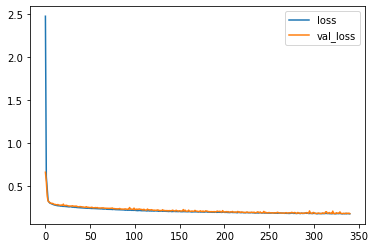

In [17]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [18]:
ann_preds = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
np.sqrt(mean_squared_error(y_test, ann_preds))

0.42658064815123387

In [21]:
np.mean(bottom90['SalePrice'])

1.7854259237726098

In [24]:
prices = pd.DataFrame(y_test, columns=['True Price'])

In [25]:
ann_preds

array([[2.1907609],
       [2.5262427],
       [1.64808  ],
       ...,
       [1.2421933],
       [1.5392475],
       [2.4641306]], dtype=float32)

In [26]:
prices['Model Prediction'] = ann_preds

In [27]:
prices.tail(25)

,True Price,Model Prediction
5548,0.891,1.171656
5549,0.875,0.923040
5550,2.414,2.335051
5551,1.852,1.324708
5552,1.955,1.679759
5553,3.084,3.285319
5554,2.323,1.761614
5555,0.494,0.590286
5556,2.968,2.339745
5557,2.065,2.243132


<AxesSubplot:xlabel='True Price', ylabel='Model Prediction'>

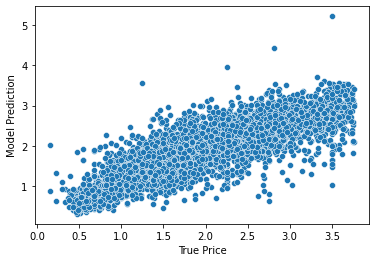

In [28]:
sns.scatterplot(x='True Price', y='Model Prediction', data=prices)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)
lm_preds = lm.predict(X_test)

In [31]:
np.sqrt(mean_squared_error(y_test, lm_preds))

0.54735710342653

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rfm = RandomForestRegressor(n_estimators=128)
rfm.fit(X_train, y_train)
rfm_preds = rfm.predict(X_test)

In [34]:
np.sqrt(mean_squared_error(y_test, rfm_preds))

0.3839054818523176

C:\Users\elber\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\elber\anaconda3\envs\mlenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

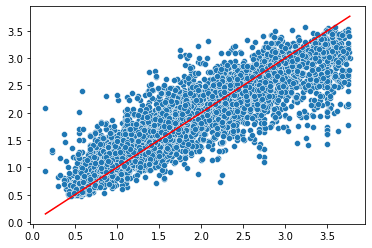

In [35]:
sns.scatterplot(y_test, rfm_preds)
sns.lineplot(y_test, y_test, color='r')

In [36]:
prices['RandomForest Predictions'] = rfm_preds

In [37]:
prices['ann_loss'] = np.absolute(prices['True Price'] - prices['Model Prediction'])

In [38]:
prices['rf_loss'] = np.absolute(prices['True Price'] - prices['RandomForest Predictions'])

In [39]:
def best_model(ann, rf):
    if ann < rf:
        return 'ANN'
    else:
        return 'Random Forests'

In [40]:
prices['Best Model'] = prices.apply(lambda x: best_model(x['ann_loss'], x['rf_loss']),axis=1)

In [41]:
prices.groupby('Best Model').count()['True Price']

Best Model
ANN               2348
Random Forests    3225
Name: True Price, dtype: int64